In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GalPot
import os

In [2]:
df = pd.read_csv('McMillan2017MilkyWayMCMCOutput.csv')

# Choose a model randomly from the chain (weighted by N\_chain) 

### the value of _model_ here is a line number, and is used below

In [3]:
rng = np.random.default_rng()
model = rng.choice(len(df),p=df['N_chain']/np.sum(df['N_chain']))

# Write to temporary file, and read from file

In [4]:
tmpname = 'tmpMW.pot'
nd,ns=4,2  # Number of discs, Number of spheroids

paramList = df.iloc[model]  # N.B. Here we use the value 'model' found above 
    
# Write to file so GalPot understands
with open(tmpname,'w') as f:
    # Number of discs
    f.write(f'{nd}\n')
    # Parameters of the discs
    for i in range(nd):
        for j in range(5):
            f.write(str(paramList[f'DiskPar{i}{j}']))
            if(j!=4): f.write(' ')
        f.write('\n')
        
    # Number of spheroids
    f.write(f'{ns}\n')
    # Parameters of spheroids
    for i in range(ns):
        for j in range(6):
            f.write(str(paramList[f'SphrPar{i}{j}']))
            if(j!=5): f.write(' ')
        f.write('\n')
f.close()

Phi = GalPot.GalaxyPotential(tmpname)

# remove file - remove this code if you don't want to!
if os.path.exists(tmpname):
    os.remove(tmpname)
else:
    print("The file does not exist for some reason")

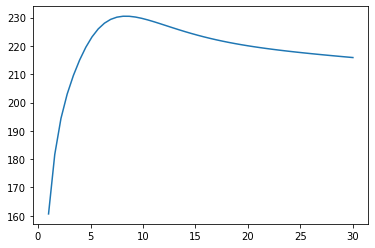

In [5]:
R = np.linspace(1,30)
vc = Phi.Vcirc(R)
plt.plot(R,vc*Phi.kpc_Myr_to_km_s)
plt.show()

# Additional option - write to AGAMA format (only partially checked)

In [6]:
agamaName = 'MCMC_MW.pot'
nd,ns=4,2  # Number of discs, Number of spheroids

def discName(i): 
    if i == 0: return 'Potential thin disk'
    elif i == 1: return 'Potential thick disk' 
    elif i == 2: return 'Potential HI gas disk'
    else: return 'Potential molecular gas disk'

def sphrName(i): 
    if i == 0: return 'Potential bulge'
    else: return 'Potential halo'

    
# Write to file so GalPot understands
with open(agamaName,'w') as f:
    # Parameters of the discs
    for i in range(nd):
        f.write(f'[{discName(i)}]\ntype = Disk\n')
        parnames = [f'DiskPar{i}{j}' for j in [0,1,2,3]]
        f.write(f"surfaceDensity = {paramList[parnames[0]]:e}\n")
        f.write(f"scaleRadius = {paramList[parnames[1]]}\n")
        f.write(f"scaleHeight = {paramList[parnames[2]]}\n")
        if(i>1) :
            f.write(f"innerCutoffRadius = {paramList[parnames[3]]}\n")
        f.write('\n')
        
    # Parameters of spheroids
    for i in range(ns):
        f.write(f'[{sphrName(i)}]\ntype = Spheroid\n')
        parnames = [f'SphrPar{i}{j}' for j in range(6)]
        f.write(f"densityNorm = {paramList[parnames[0]]:e}\n")
        f.write(f"axisRatioZ = {paramList[parnames[1]]}\n")
        f.write(f"gamma = {paramList[parnames[2]]}\n")
        f.write(f"beta = {paramList[parnames[3]]}\n")
        f.write(f"scaleRadius = {paramList[parnames[4]]}\n")
        if i==0:
            f.write(f"outerCutoffRadius = {paramList[parnames[5]]}\n")
        f.write('\n')
f.close()
